<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/ManipFichier_Corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gérer et préparer vos données pour le traitement
Dans Data Science, il y a "Data". Il s'agit là encore un fois de la base du travail d'un numéricien de ce domaine. 

Une données est une description de la réalité, qui peut evidemment être de (très) différente nature (image, texte ect...) 

Evidemment, il est toujours préférable de conserver et de travailler avec le plus de données pertinentes possible. Or il devient vite évident qu'il est impossible de toujousr tout conserver. 
Il est alors primordiale de savoir faire sortir l'essentiel d'un jeu de données. Cette selection de la donnée est issue d'un processus qui doit être le plus neutre possible ou bien orienté de façon à répondre de manière précise a un problème posé. 

##Les types de données 

On distingue de manière commune deux catégories de données : 


1.   Les données structurées

Ce sont les données que l'on traite habituellement en en science de la donnée. Elles se composent de valeurs chiffrées ou bien de chaines de caratères. On s'attend donc à avoir une ligne par individu statistique et une colonne par variable. 

2.  Les données non-structurées 

Ils s'agit de données ne possédants pas de structure standard. Elle sont compréhensible par les humains mais necessites des étapes supplémentaires pour être lisibles par une machine. 

L'un des tâches du Data Scientist est aujourd'hui de transformer les données non-struturées en structurées afin de permettre leur application et utilisation. 

Exemples

Parmis les données présentées ici, lesquelles sont structurées et lequelles sont non-structurées ?
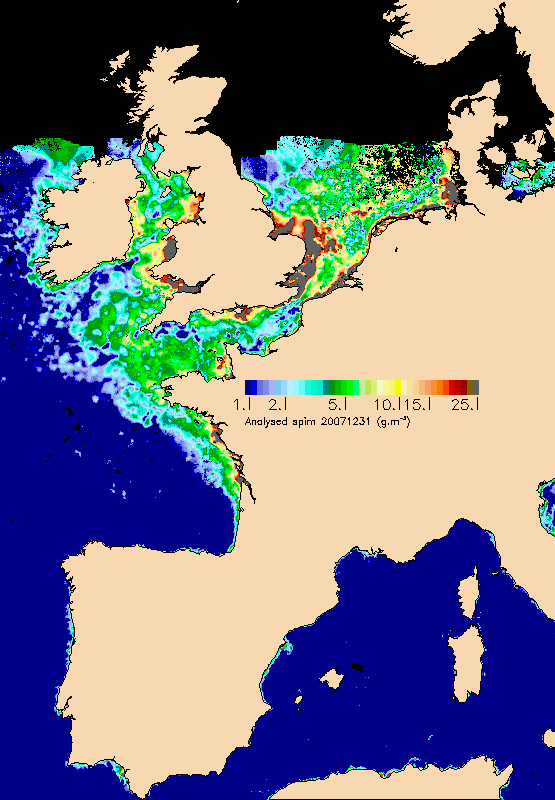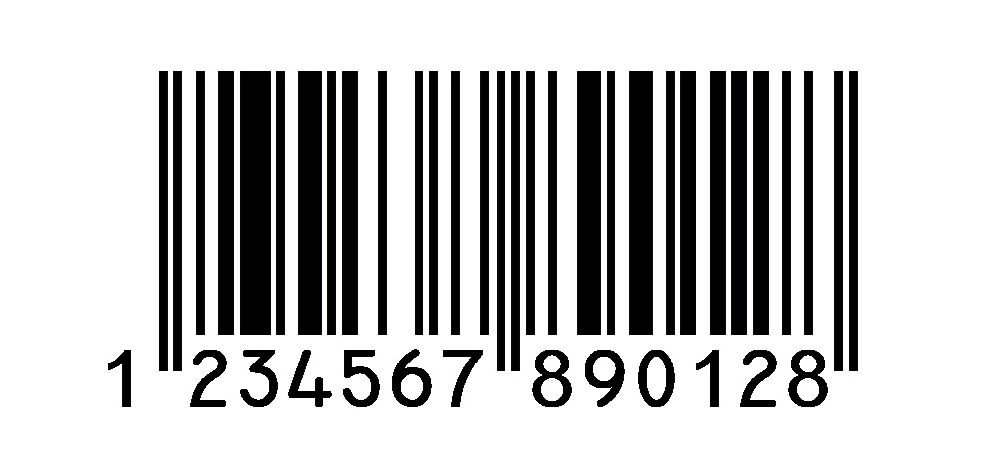
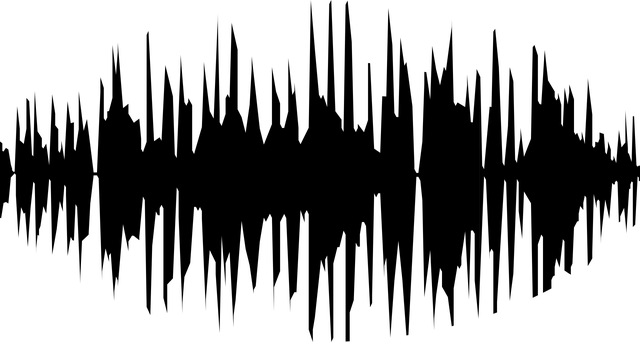
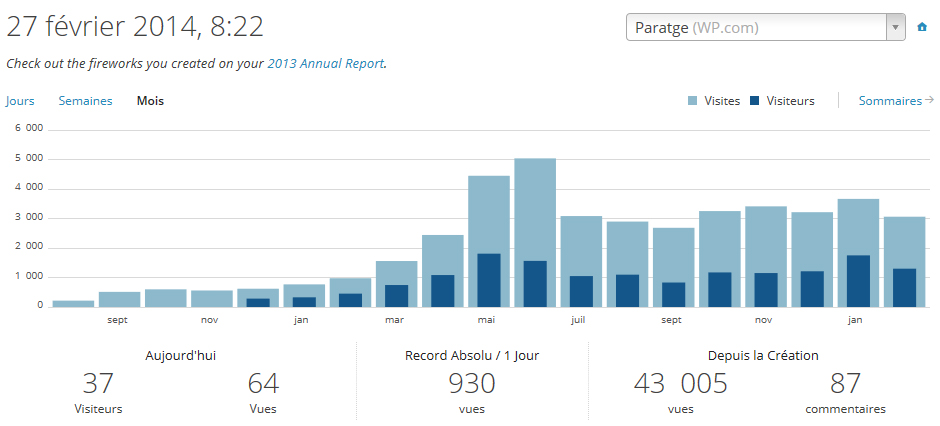

##Préparation des données 

La préparation des données peut être résumé en 3 étapes cruciales : 


1.   Récupération
2.   Structuration
3.   Transformation

Le tout pouvant évidemment être traité sous python 
Nous allons voir dans un premiers temps les manipulation sous numpy et pandas 

In [ ]:
import numpy as np
import pandas as pd

# Récupération des données
Pour ce premier travail, nous allons travailler sur des données non-structurées, pour l'importation de données structurées voir : https://mybinder.org/v2/gh/GeoLabUniLaSalle/Python/HEAD?filepath=Les_fichiers_externes.ipynb

Première étape les données de sites : 
* A vous de retrouver le tableau des records masculins dans la page wiki https://fr.wikipedia.org/wiki/Coupe_du_monde_de_water-polo : 

In [ ]:
ma_page = pd.read_html("https://fr.wikipedia.org/wiki/Coupe_du_monde_de_water-polo",
                     header="infer")
# Afficher le tableau de résutats du tableau des médailles feminines 
tableaux_records = ma_page[3]
tableaux_records.head()

,Rang,Nation,Or,Argent,Bronze,Total
0,1,Hongrie,4,4,2,10
1,2,Yougoslavie[3],2,1,1,4
2,3,États-Unis,2,2,0,4
3,4,Union soviétique[4],2,1,0,3
4,5,Serbie,2,0,1,3


Ensuite nous allons travailler sur les images et les données sonores

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
img = misc.face()

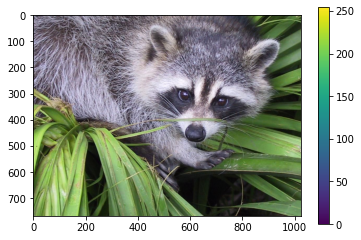

In [ ]:
plt.imshow(img)
plt.show()

On peut aussi construire des images directement à partir d'arrays. Ainsi on construit une image avec des couleurs générées aléatoirement :

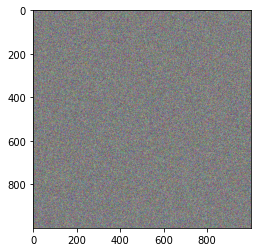

In [ ]:
array_image_rand=np.random.randint(0,255,(1000,1000,3))
plt.imshow(array_image_rand)
# on sauvegarde cette figure
plt.savefig("mon_image.jpg")

In [ ]:
img.shape

(768, 1024, 3)

In [ ]:
img.ndim

3

In [ ]:
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

A vous de jouer : 
* Que caraterises les valeurs des dimensions de l'image ? 
* Quelle sera la shape de la Première dimension de l'image ? 

In [ ]:
img[:, :, 0].shape

(768, 1024)

In [ ]:
img_array = img / 255

A vous de jouer : 
* A votre avis que se passe-til si on replace l'ensemble des valeur de notre image entre 0 et 1 
* Diviser chaque couleur en un matrice séparée en utilisant une slice et afficher une image de la couleur avec sa barre de valeur correspondante 

In [ ]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

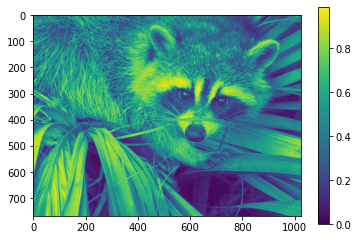

In [ ]:
plt.imshow(green_array)
plt.colorbar()

## Fichiers sonores
Dans le cas de fichiers sonores il est possible de travailler directement sur ceux-ci afin de les utiliser comme données utilisables. 

In [ ]:
!rm -rf Python
!git clone https://github.com/GeoLabUniLaSalle/Python
import IPython.display as ipd
ipd.Audio('/content/Python/data_2022.wav')

Cloning into 'Python'...
remote: Enumerating objects: 651, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (417/417), done.
remote: Total 651 (delta 309), reused 0 (delta 0), pack-reused 234
Receiving objects: 100% (651/651), 13.96 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (486/486), done.


Pour charger des données sonores, on utilisera un package spécifique nommé Librosa qui va nous aider à récupérer des données sonores :

In [ ]:
import librosa

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
# Ce code permet d’extraire des données d’un extrait sonore.
data, sampling_rate = librosa.load('/content/Python/data_2022.wav')
print(sampling_rate)

22050


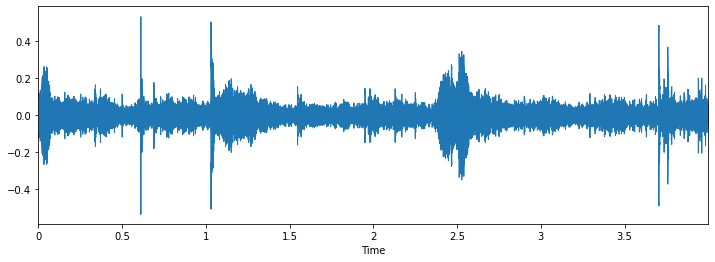

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
data.shape

(88200,)

# Préparation des données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Nous allons utiliser ici des données AirBnb

In [ ]:
# Import du fichier complet
listing = pd.read_csv("https://www.stat4decision.com/listings.csv.gz", index_col=0)
calendar = pd.read_csv("https://www.stat4decision.com/calendar.csv.gz", index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Quel que soit le type de structure que vous utilisez ; les arrays, les Series ou les DataFrame, on utilise généralement une propriété de ces objets : la propriété .shape. Celle-ci renvoie toujours un tuple, qui aura autant d’éléments que de dimensions dans vos données.



In [ ]:
calendar.shape

(24214662, 6)


Cette information est importante mais reste peu détaillée. Lorsqu’on travaille sur un DataFrame, on va chercher à avoir beaucoup plus de détails. Pour cela, nous allons utiliser la méthode .info(). Si nous prenons le jeu de données des occupations des logements AirBnB, nous aurons :

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24214662 entries, 2577 to 45493044
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   available       object 
 2   price           object 
 3   adjusted_price  object 
 4   minimum_nights  float64
 5   maximum_nights  float64
dtypes: float64(2), object(4)
memory usage: 1.3+ GB


Une autre étape importante est l’étude de l’aspect de notre DataFrame, on peut par exemple afficher les premières lignes du jeu de données.

In [ ]:
calendar.head()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
2577,2020-10-19,f,$125.00,$125.00,3.0,1125.0
73533,2020-10-20,t,$95.00,$95.00,2.0,1125.0
73533,2020-10-21,t,$95.00,$95.00,2.0,1125.0
73533,2020-10-22,t,$95.00,$95.00,2.0,1125.0
73533,2020-10-23,t,$95.00,$95.00,2.0,1125.0


Une autre propriété importante des DataFrame de Pandas est .columns. En effet, celle-ci a deux utilités :

* afficher le nom des colonnes de votre DataFrame,
* créer une structure permettant d’avoir une liste des colonnes que nous pourrons utiliser pour des automatisations.

In [ ]:
calendar.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [ ]:
# on peut faire une boucle sur les colonnes de notre DataFrame
for col in calendar.columns:
    print(col, calendar[col].dtype, sep=" : ")

date : object
available : object
price : object
adjusted_price : object
minimum_nights : float64
maximum_nights : float64


A vous de jouer : 
* Caratériser de la même manière listing 
* Afficher les information de la première colonne de listing, que remarquez-vous qui pourrait vous gêner dans votre travail d'analyse de données ? 
* Proposer un moyen de corriger ce problème

In [ ]:
listing["price"].head()

id
2577    $125.00
3109     $60.00
4886     $89.00
4890    $103.00
5396     $48.00
Name: price, dtype: object

In [ ]:
# élimine le premier élément
listing["price"].str[1 :]
#%timeit listing["price"].str.replace("$","")
#%timeit listing["price"].str.strip("$")

id
2577        125.00
3109         60.00
4886         89.00
4890        103.00
5396         48.00
             ...  
45823497     32.00
45824219     90.00
45824371     45.00
45825687     45.00
45828064     33.00
Name: price, Length: 66334, dtype: object

In [ ]:
listing["price"]= pd.to_numeric(listing["price"].str.strip("$").str.replace(",",""))

In [ ]:
print(listing["price"].dtype)

float64


A vous de jouer : 
* proposer un moyen d'automatiser ce traitement sur le jeu de données calendar

In [ ]:
for col in listing.columns:
    if listing[col].dtype==object :
        listing[col]= pd.to_numeric(listing[col].str.strip("$")\
                                                .str.replace(",", ""), errors="ignore")

## Les données temporelles

In [ ]:
x=np.arange("2017-01-01","2018-01-01", dtype="datetime64[W]")

En utilisant la fonction timedelta de numpy (https://numpy.org/doc/stable/reference/arrays.datetime.html) trouver à quelle date correspond 378734400 seconde passée du 1er janvier 1998

In [ ]:
np.datetime64('1998-01-01')+np.timedelta64(378734400, 's')

numpy.datetime64('2010-01-01T12:00:00')

A partir de la série x de dates, proposer un plot contenant une array générée aléatoirement en y et les dates x en ordonnées 

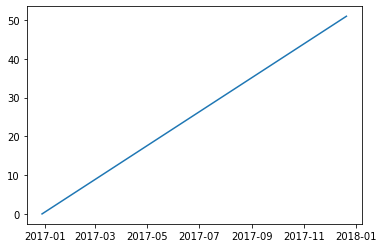

In [ ]:
plt.plot(x,np.arange(x.shape[0]))

## Matrice masquées

Dans le cas d'un jeu de données partiel, si vous effectuez un traitement quelconque sur ces données et que vous souhaitez ignorer ou signaler ces entrées indésirables sans les supprimer, il est possible d'utiliser une structure de matrice masquées . Le module numpy.ma fournit certaines des fonctionnalités des ndarrays de NumPy avec une structure supplémentaire pour s'assurer que les entrées invalides ne sont pas utilisées dans les calculs.


Il existe quelques situations où les tableaux masqués peuvent être plus utiles que la simple élimination des entrées invalides d'un tableau :

* Lorsque vous souhaitez conserver les valeurs que vous avez masquées pour un traitement ultérieur, sans copier le tableau ;

* Lorsque vous devez gérer de nombreux tableaux, chacun avec son propre masque. Si le masque fait partie du tableau, vous évitez les bogues et le code est peut-être plus compact ;

* Lorsque vous avez différents drapeaux pour les valeurs manquantes ou invalides, et que vous souhaitez préserver ces drapeaux sans les remplacer dans l'ensemble de données original, mais en les excluant des calculs ;

* Si vous ne pouvez pas éviter ou éliminer les valeurs manquantes, mais que vous ne voulez pas traiter les valeurs NaN (Not a Number) dans vos opérations.


Nous allons voir un exemple de donneés masquées

In [ ]:
import numpy as np

# Later we will use random number sequences.
rng = np.random.default_rng(2020)

# make an example of an 8-bit integer masked array:
x = np.ma.array([1, 100, 2, 3], mask=[False, True, False, False],
                dtype=np.int8)
print("The input integer masked array is:")
print(x)

xnan = np.ma.filled(x.astype(float), np.nan)
print("Converted to double precision, with nan:")
print(xnan)

The input integer masked array is:
[1 -- 2 3]
Converted to double precision, with nan:
[ 1. nan  2.  3.]


In [ ]:
# sample input ndarray:
x = np.array([1.0, 2.5, np.nan, 1.3, np.inf, 7.2])
print("input array with bad values:")
print(x)

xm = np.ma.masked_invalid(x)
print("masked version:")
print(xm)

input array with bad values:
[1.  2.5 nan 1.3 inf 7.2]
masked version:
[1.0 2.5 -- 1.3 -- 7.2]


In [ ]:
xm = np.ma.arange(5)
xm[[1, 2]] = np.ma.masked
print(xm)

[0 -- -- 3 4]


In [ ]:
x = np.array([1, 2, 3])
y = np.array([1, 0, 1])
print(x * y)
print(x/y)

[1 0 3]
[ 1. inf  3.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Avou de jouer : 
* Utiliser un masque pour pouvoir effectuer une division sans provoquer d'erreur

In [ ]:
x = np.array([1, 2, 3])
y = np.array([1, 0, 1])
print(x * y)
print(x/y)

[1 0 3]
[ 1. inf  3.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Pour les opérations comme l'addition et la multiplication, une valeur masquée se comporte comme un NaN : la sortie est masquée. La division est plus intéressante : la division par zéro donne une valeur masquée, et non une erreur :

In [ ]:
x = np.ma.array([1, 2, 3], mask=[False, False, True])
y = np.ma.array([1, 0, 1])
print(x * y)
print(x/y)

[1 0 --]
[1.0 -- --]


## Sauver différents types de fichiers 
Afin de pouvoir réutiliser son travail il est important de savoir comment conserver ses fichiers. Voila quelques exemples 

In [ ]:
x = np.arange(0, 10, 1)
y = x ** 2
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


Saving as npy (basic numpy array)

In [ ]:
np.save('my array', x)

Saving as a csv

In [ ]:
array_out = np.block([x[:, np.newaxis], y[:, np.newaxis]])
print("the output array has shape ", array_out.shape, " with values:")
print(array_out)

the output array has shape  (10, 2)  with values:
[[ 0  0]
 [ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]
 [ 5 25]
 [ 6 36]
 [ 7 49]
 [ 8 64]
 [ 9 81]]


In [ ]:
np.savetxt("x_y-squared.csv", X=array_out, header="x, y", delimiter=",")

## Presentation graphique de vos données
Afin de pouvoir communiquer et proposer des analyses pertinente de votre jeu de données, il est primordial de savoir proposer les graphiques les plus appripriés. 
Vous trouverez ici quelques exemples et rappels. 

La bibliothèque de base des représentation graphiques sur python est matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

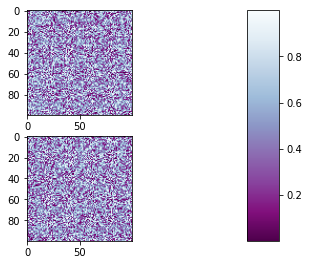

In [ ]:
plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

A vous de jouer : 
* Lier la colorbar au premier subplot
* Ajouter un troisième subplot d'un plot d'une courbe de 100 données 
* Ajouter un tire (fig1/Fig2) sur chaques subplot

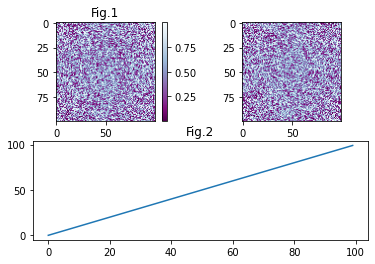

In [ ]:
plt.subplot(222)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplot(221)      
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.title('Fig.1')
plt.colorbar()

plt.subplot(212) 
plt.plot(np.arange(100))
plt.title('Fig.2')

plt.show()

Interact permet de créer des curseurs qui peuvent être modifié en simultané. Fonctionne également avec les images et plot

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

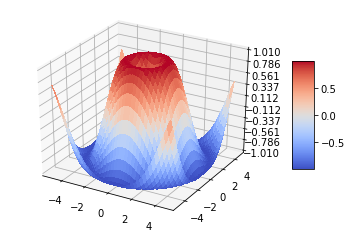

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Dans le but d'éffectuer des correlation il est possible de visualiser des variables croisées


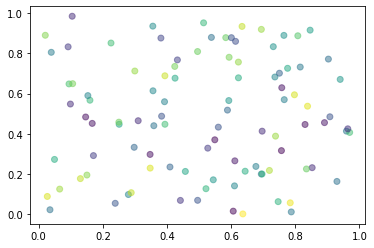

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()